In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import sys

In [35]:
sns.set_style("whitegrid")

file_path = "DistanceTest_2019_11_25_20_48_00_Run8.csv"

   Time (s)  Range (mm)  Lumens (0dB)
0      0.77          48          0.64
1      1.06          49          0.64
2      1.26          49          0.64
3      2.25          49          0.58
4      2.41          49          0.58


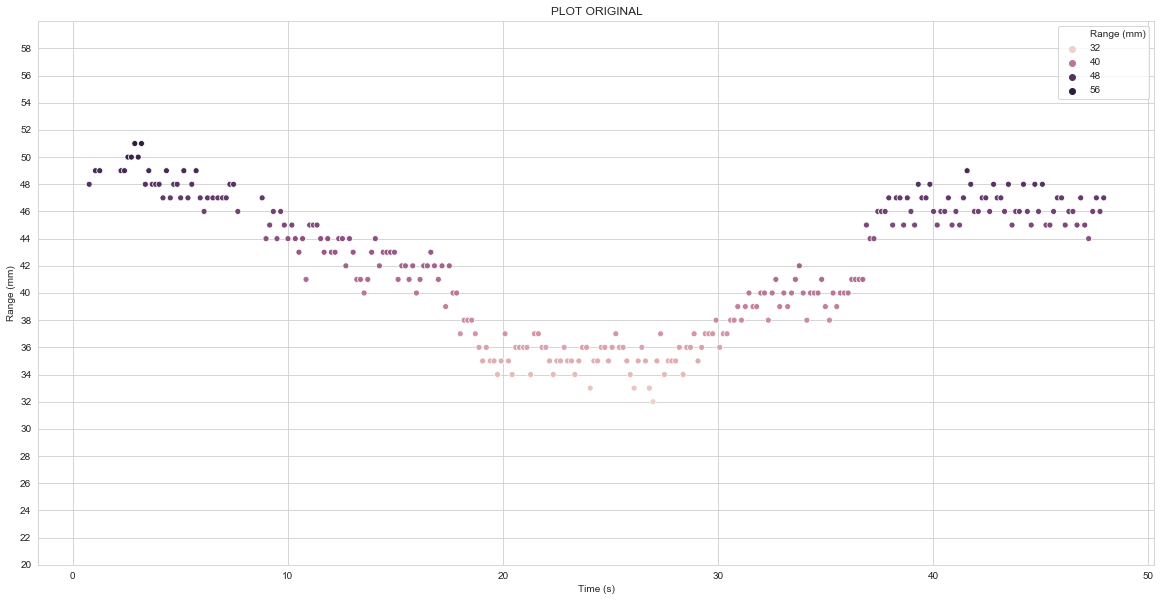

In [36]:
dfOriginal = pd.read_csv(file_path, encoding = 'utf-8')

print(dfOriginal.head())

ax = sns.scatterplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, hue = "Range (mm)")
ax.set_ylim([20, 60])
plt.title("PLOT ORIGINAL")
plt.yticks(np.arange(20, 60, step = 2))

fig = plt.gcf() # get current figures
fig.set_size_inches(20, 10)

   Time (s)  Range (mm)  Range Avg 5 (mm)  Range Avg 10 (mm)  \
0      0.77          48               NaN                NaN   
1      1.06          49               NaN                NaN   
2      1.26          49               NaN                NaN   
3      2.25          49               NaN                NaN   
4      2.41          49              48.8                NaN   

   Range Avg 15 (mm)  Range Avg 20 (mm)  Lumens (0dB)  
0                NaN                NaN          0.64  
1                NaN                NaN          0.64  
2                NaN                NaN          0.64  
3                NaN                NaN          0.58  
4                NaN                NaN          0.58  
Figure saved


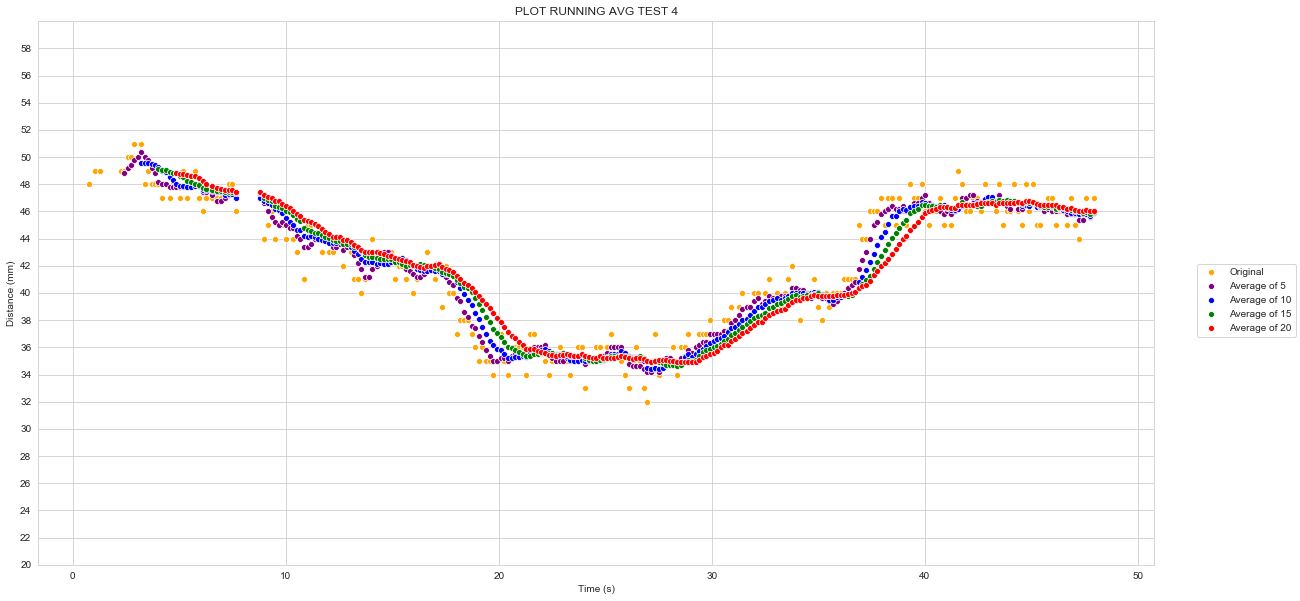

In [37]:
dfAveraged = dfOriginal

try:
    dfAveraged.insert(2, "Range Avg 5 (mm)", value = np.NaN)
    dfAveraged.insert(3, "Range Avg 10 (mm)", value = np.NaN)
    dfAveraged.insert(4, "Range Avg 15 (mm)", value = np.NaN)
    dfAveraged.insert(5, "Range Avg 20 (mm)", value = np.NaN)
except ValueError:
    pass

dfAveraged["Range Avg 5 (mm)"] = dfAveraged.rolling(window = 5)["Range (mm)"].mean() 
dfAveraged["Range Avg 10 (mm)"] = dfAveraged.rolling(window = 10)["Range (mm)"].mean() 
dfAveraged["Range Avg 15 (mm)"] = dfAveraged.rolling(window = 15)["Range (mm)"].mean() 
dfAveraged["Range Avg 20 (mm)"] = dfAveraged.rolling(window = 20)["Range (mm)"].mean() 

print(dfAveraged.head())

ax = sns.scatterplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, color = "orange")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 5 (mm)", data = dfOriginal, color = "purple")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 10 (mm)", data = dfOriginal, color = "blue")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 15 (mm)", data = dfOriginal, color = "green")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 20 (mm)", data = dfOriginal, color = "red")

ax.set_ylim([20, 60])
plt.title("PLOT RUNNING AVG TEST 4")
plt.ylabel("Distance (mm)")
plt.yticks(np.arange(20, 60, step = 2))

fig = plt.gcf() # get current figures
fig.legend(labels = ["Original", "Average of 5", "Average of 10", "Average of 15", "Average of 20"], loc = "right")
fig.set_size_inches(20, 10)

currentDT = datetime.now()
fig.savefig(file_path + "_" + currentDT.strftime("%Y_%m_%d_%H_%M_%S") + ".pdf", dpi = 2400)
print("Figure saved")